In [487]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [488]:
boston=load_boston()
x=boston.data
y=boston.target

c:\Users\Armaan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

In [489]:
x.shape,y.shape

((506, 13), (506,))

In [490]:
u=np.mean(x,axis=0)
std=np.std(x,axis=0)
x=(x-u)/std

In [491]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [492]:
def cost_fn(x,y,w,b):
    cost=0
#    print(x)
    for i in range(len(x)):
        y_true=y[i]
        y_pred=np.dot(x[i],w)+b
        cost+=(y_true-y_pred)**2
    cost=cost/len(x)
    return cost

In [493]:
def stepgradient(x,y,w,b,lr):
    dw=np.zeros(len(w))
    db=0
    for i in range(len(w)):  
        for j in range(len(x)):
            y_true=y[j]
            y_pred=np.dot(x[j],w)+b
            dw[i]+=2*((y_pred-y_true)*x[j][i])/len(x)
            db+=2*(y_pred-y_true)/len(x)
    w=w-lr*dw
    b=b-lr*db
    return w,b

In [494]:
def fit(x_train,y_train,lr,itr):
    x_train=np.array(x_train)
    y_train=np.array(y_train)
    w=np.zeros(len(x_train[0]))
    b=0
    for i in range(itr):
        w,b=stepgradient(x_train,y_train,w,b,lr)
    print(" Cost=",cost_fn(x_train,y_train,w,b))
    return w,b

In [495]:
def predict(x,w,b):         
    predictions=[]
    for i in range(len(x)):
        y_pred=np.sum(x[i]*w)+b
        predictions.append(y_pred)
    return predictions

In [496]:
def score(y_pred,y_true):
    u=((y_true-y_pred)**2).sum()
    v=((y_true-y_true.mean())**2).sum()
    return 1-(u/v)

In [510]:
w,b=fit(x_train,y_train,0.01,500)
y_pred=predict(x_test,w,b)
s=score(y_pred,y_test)
s

 Cost= 19.848519113011335


0.6228073476602844

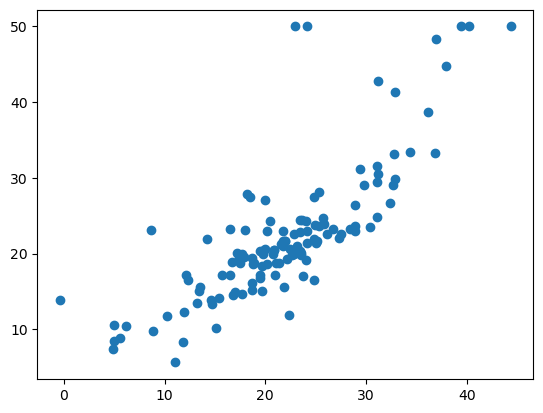

In [511]:
from matplotlib import pyplot as plt

plt.scatter(y_pred,y_test)

plt.show()

In [512]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(x_train,y_train)

LinearRegression()

In [513]:
predictions=clf.predict(x_test)

In [514]:
clf.score(x_test,y_test)

0.6354638433202131

In [515]:
m=np.array([1,1,1])
n=np.array([1,2,3])
3*m-n

array([2, 1, 0])

In [516]:
compare=pd.DataFrame()
compare["clf"]=predictions
compare["y_pred"]=y_pred
compare

,clf,y_pred
0,24.952333,26.158830
1,23.616997,22.948285
2,29.205886,28.864696
3,11.960705,11.782688
4,21.333620,21.578784
...,...,...
122,17.538048,17.431270
123,21.502223,21.788176
124,23.632813,23.480279
125,20.282598,18.854280
